After collecting the data from statistics canada for this project, the data must be cleaned before it can be processed and analyzed. To start with, import the following libraries that will be used throughout the data cleaning process.

In [1]:
# Import libraries that will be used for data cleaning process
import pandas as pd
import numpy as np

Next, lets load the commuting data from the raw data folder, and do some initial manual examination of the .csv file.

In [2]:
# Load the commuting data
file_path = "../data/raw/raw_commuting_data.csv"
commuting_data = pd.read_csv(file_path)

# Inspect the first five rows and data structure
print(commuting_data.head())

  Commuting duration by main mode of commuting and time arriving at work: Canada, provinces and territories, census divisions and census subdivisions of work  \
0                              Frequency: Occasional                                                                                                            
1                               Table: 98-10-0503-01                                                                                                            
2                                                NaN                                                                                                            
3                           Release date: 2023-11-15                                                                                                            
4  Geography: Canada, Province or territory, Cens...                                                                                                            

  Unnamed: 1 Unnamed: 2 Unnamed: 

As we can see, there seems to be an error. Opening the .csv file, we can see that there is some metadata at the top and bottom of the file:

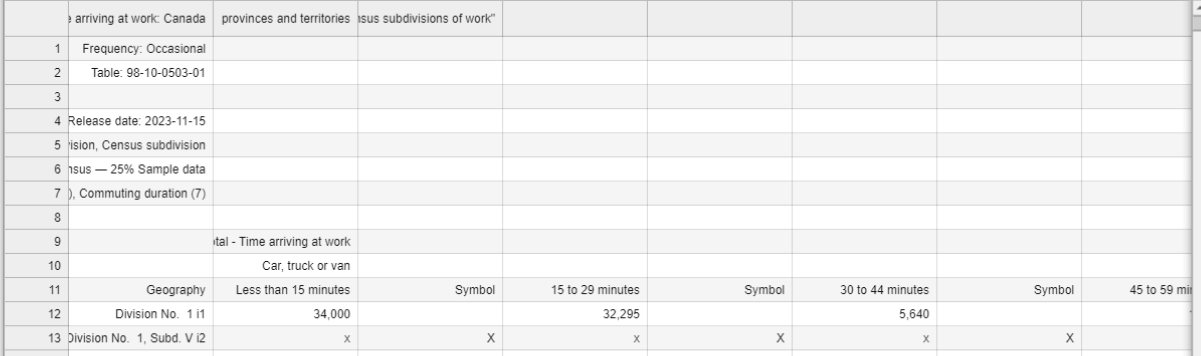

Let's trim down the first and last few rows of metadata to remove any non-useful data that might have been included for descriptive purposes by the data provider (Statistics Canada).

In [3]:
# Skip metadata rows
commuting_data = commuting_data.iloc[11:-8].reset_index(drop=True)

# Re-inspect the top and bottom of the data table after removing metadata rows
print(commuting_data.head())
print("=" * 149) # Seperator between the head and tail
print(commuting_data.tail())

  Commuting duration by main mode of commuting and time arriving at work: Canada, provinces and territories, census divisions and census subdivisions of work  \
0                                 Division No.  1 i1                                                                                                            
1                        Division No.  1, Subd. V i2                                                                                                            
2                             Portugal Cove South i3                                                                                                            
3                                       Trepassey i4                                                                                                            
4                                     St. Shott's i5                                                                                                            

  Unnamed: 1 Unnamed: 2 Unnamed: 

Now that we have gotten rid of the metadata, row 0 is now our column headers. 
let's go ahead and rename the columns so they are more easy to understand at a glance. Definitions for the tables have been found at "https://www.statcan.gc.ca/en/developers/csv/user-guide".

Before we start renaming the column headers, we can open the raw_commmuting_data.csv file and observe the pattern of column headers, which is as follows:

[Mode_of_transportation]

Less than 15 minutes | symbol | 15 to 29 minutes | symbol | 30 to 44 minutes | symbol | 45 to 60 minutes | symbol | average duration in minutes | symbol |

Each of these "symbol" columns are either populated with 'x', 'X', or are empty (NULL). According to Statistics Canada, an X indicates the censorship of data for privacy reasons, so we cannot get any useful data from these columns. Let's remove them from the data table now:

In [4]:
# Drop every other column (keep column 0, 2, 4, ...)
columns_to_keep = [commuting_data.columns[0]] + [col for i, col in enumerate(commuting_data.columns[1:]) if i % 2 == 0]

# Create a new dataframe with only the selected columns
commuting_data = commuting_data[columns_to_keep]

# Print the cleaned commuting data and it's information
print(commuting_data.head())

  Commuting duration by main mode of commuting and time arriving at work: Canada, provinces and territories, census divisions and census subdivisions of work  \
0                                 Division No.  1 i1                                                                                                            
1                        Division No.  1, Subd. V i2                                                                                                            
2                             Portugal Cove South i3                                                                                                            
3                                       Trepassey i4                                                                                                            
4                                     St. Shott's i5                                                                                                            

  Unnamed: 1 Unnamed: 3 Unnamed: 

Now, lets replace all values of 'x' with NaN (NaN represents an empty cell). This will allow us to clean the data further.

In [5]:
# Replace all "x" values with NaN
commuting_data = commuting_data.replace("x", "X")
print(commuting_data.head())

  Commuting duration by main mode of commuting and time arriving at work: Canada, provinces and territories, census divisions and census subdivisions of work  \
0                                 Division No.  1 i1                                                                                                            
1                        Division No.  1, Subd. V i2                                                                                                            
2                             Portugal Cove South i3                                                                                                            
3                                       Trepassey i4                                                                                                            
4                                     St. Shott's i5                                                                                                            

  Unnamed: 1 Unnamed: 3 Unnamed: 

In [6]:
commuting_data = commuting_data.replace("X", np.nan)

# Verify the replacement
print(commuting_data.head())
print(commuting_data.tail())

  Commuting duration by main mode of commuting and time arriving at work: Canada, provinces and territories, census divisions and census subdivisions of work  \
0                                 Division No.  1 i1                                                                                                            
1                        Division No.  1, Subd. V i2                                                                                                            
2                             Portugal Cove South i3                                                                                                            
3                                       Trepassey i4                                                                                                            
4                                     St. Shott's i5                                                                                                            

  Unnamed: 1 Unnamed: 3 Unnamed: 

Now, lets replace all values of NaN with the value '0'.

In [7]:
# Replace all values of NaN with the value '0'
commuting_data = commuting_data.fillna(0)

# Verify the newly cleaned dataframe
print(commuting_data.head())
print("=" * 149)
print(commuting_data.tail())

  Commuting duration by main mode of commuting and time arriving at work: Canada, provinces and territories, census divisions and census subdivisions of work  \
0                                 Division No.  1 i1                                                                                                            
1                        Division No.  1, Subd. V i2                                                                                                            
2                             Portugal Cove South i3                                                                                                            
3                                       Trepassey i4                                                                                                            
4                                     St. Shott's i5                                                                                                            

  Unnamed: 1 Unnamed: 3 Unnamed: 

After this, all of the cells in our dataframe should be populated. Let's verify that now:

In [8]:
print(commuting_data.isnull().all(axis=1).sum()) # Should print 0 if all cells are populated

0


Before we save the cleaned data back into .csv format, lets label the columns appropriately. There are a lot of columns, however they follow a pattern as mentioned earlier, just without the "symbol" columns:

[Mode_of_transportation]

Less than 15 minutes | 15 to 29 minutes | 30 to 44 minutes | 45 to 60 minutes | average duration in minutes | ...

To do this, it might be a good idea to append the mode of transportation before the time values as such:

mode_of_transportation_less_than_15 | mode_of_transportation_15_to_29 | ... | mode_of_transportation_avg_duration | ...

Doing this would allow us to compound the columns with identifying and descriptive columns, and while the columns may not look pretty for us to read, our program will be able to read and interpret these columns easily. Also, Lastly, let's convert the data type for each column (except the "Geography" column) into numeric columns for ease of processing later down the line.

In [9]:
# Identify the modes of transportation
modes_of_transportation = ["Car_Truck_Van", "Public_Transit", "Active_Transportation", "Motorcycle_Scooter_Moped", "Other"]
time_categories = ["Less_Than_15", "15_to_29", "30_to_44", "45_to_59", "More_Than_60", "Avg_Duration"]

# Create new column names
new_columns = ["Geography"] # Start with geography, and then iterate through with the pattern

# Iteratively change the column names using the established pattern
for mode in modes_of_transportation:
    for time in time_categories:
        new_columns.append(f"{mode}_{time}")

# Change the column headers to the new column names
commuting_data.columns = new_columns

print(commuting_data.columns)

Index(['Geography', 'Car_Truck_Van_Less_Than_15', 'Car_Truck_Van_15_to_29',
       'Car_Truck_Van_30_to_44', 'Car_Truck_Van_45_to_59',
       'Car_Truck_Van_More_Than_60', 'Car_Truck_Van_Avg_Duration',
       'Public_Transit_Less_Than_15', 'Public_Transit_15_to_29',
       'Public_Transit_30_to_44', 'Public_Transit_45_to_59',
       'Public_Transit_More_Than_60', 'Public_Transit_Avg_Duration',
       'Active_Transportation_Less_Than_15', 'Active_Transportation_15_to_29',
       'Active_Transportation_30_to_44', 'Active_Transportation_45_to_59',
       'Active_Transportation_More_Than_60',
       'Active_Transportation_Avg_Duration',
       'Motorcycle_Scooter_Moped_Less_Than_15',
       'Motorcycle_Scooter_Moped_15_to_29',
       'Motorcycle_Scooter_Moped_30_to_44',
       'Motorcycle_Scooter_Moped_45_to_59',
       'Motorcycle_Scooter_Moped_More_Than_60',
       'Motorcycle_Scooter_Moped_Avg_Duration', 'Other_Less_Than_15',
       'Other_15_to_29', 'Other_30_to_44', 'Other_45_to_59',


In [11]:
print(commuting_data.head())
print(commuting_data.isna().sum())

                     Geography Car_Truck_Van_Less_Than_15  \
0           Division No.  1 i1                     34,000   
1  Division No.  1, Subd. V i2                          0   
2       Portugal Cove South i3                          0   
3                 Trepassey i4                         35   
4               St. Shott's i5                          0   

  Car_Truck_Van_15_to_29 Car_Truck_Van_30_to_44 Car_Truck_Van_45_to_59  \
0                 32,295                  5,640                  1,515   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

  Car_Truck_Van_More_Than_60 Car_Truck_Van_Avg_Duration  \
0                      2,490                       17.1   
1                          0                          0   
2          

In [12]:
# Convert all columns except "Geography" to numeric
for column in commuting_data.columns[1:]:
    commuting_data[column] = pd.to_numeric(commuting_data[column].str.replace(",", ""), errors="coerce")

# Verify the changes
print(commuting_data.dtypes)
print(commuting_data.columns)

Geography                                 object
Car_Truck_Van_Less_Than_15               float64
Car_Truck_Van_15_to_29                   float64
Car_Truck_Van_30_to_44                   float64
Car_Truck_Van_45_to_59                   float64
Car_Truck_Van_More_Than_60               float64
Car_Truck_Van_Avg_Duration               float64
Public_Transit_Less_Than_15              float64
Public_Transit_15_to_29                  float64
Public_Transit_30_to_44                  float64
Public_Transit_45_to_59                  float64
Public_Transit_More_Than_60              float64
Public_Transit_Avg_Duration              float64
Active_Transportation_Less_Than_15       float64
Active_Transportation_15_to_29           float64
Active_Transportation_30_to_44           float64
Active_Transportation_45_to_59           float64
Active_Transportation_More_Than_60       float64
Active_Transportation_Avg_Duration       float64
Motorcycle_Scooter_Moped_Less_Than_15    float64
Motorcycle_Scooter_M

In [13]:
commuting_data = commuting_data.fillna(0)

In [14]:
# Let's see how the data looks now with the new column names.
print(commuting_data.head())
print("=" * 149)
print(commuting_data.tail())

                     Geography  Car_Truck_Van_Less_Than_15  \
0           Division No.  1 i1                     34000.0   
1  Division No.  1, Subd. V i2                         0.0   
2       Portugal Cove South i3                         0.0   
3                 Trepassey i4                        35.0   
4               St. Shott's i5                         0.0   

   Car_Truck_Van_15_to_29  Car_Truck_Van_30_to_44  Car_Truck_Van_45_to_59  \
0                 32295.0                  5640.0                  1515.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Car_Truck_Van_More_Than_60  Car_Truck_Van_Avg_Duration  \
0                      2490.0                        17.1   
1                         0.0             

Before we export this data to .csv, we should check to see if there are any duplicate rows/entries to ensure data cleanliness and reliability going into the future data analysis phase.

In [18]:
# Check for duplicates in the commuting data
duplicate_commuting = commuting_data[commuting_data.duplicated(subset="Geography", keep=False)]
print(f"Duplicate entries in commuting data: {duplicate_commuting}")

Duplicate entries in commuting data: Empty DataFrame
Columns: [Geography, Car_Truck_Van_Less_Than_15, Car_Truck_Van_15_to_29, Car_Truck_Van_30_to_44, Car_Truck_Van_45_to_59, Car_Truck_Van_More_Than_60, Car_Truck_Van_Avg_Duration, Public_Transit_Less_Than_15, Public_Transit_15_to_29, Public_Transit_30_to_44, Public_Transit_45_to_59, Public_Transit_More_Than_60, Public_Transit_Avg_Duration, Active_Transportation_Less_Than_15, Active_Transportation_15_to_29, Active_Transportation_30_to_44, Active_Transportation_45_to_59, Active_Transportation_More_Than_60, Active_Transportation_Avg_Duration, Motorcycle_Scooter_Moped_Less_Than_15, Motorcycle_Scooter_Moped_15_to_29, Motorcycle_Scooter_Moped_30_to_44, Motorcycle_Scooter_Moped_45_to_59, Motorcycle_Scooter_Moped_More_Than_60, Motorcycle_Scooter_Moped_Avg_Duration, Other_Less_Than_15, Other_15_to_29, Other_30_to_44, Other_45_to_59, Other_More_Than_60, Other_Avg_Duration]
Index: []

[0 rows x 31 columns]


Perfect, we are now ready to export the data to .csv in our "processed" data folder.

In [15]:
commuting_data.to_csv("../data/processed/cleaned_commuting_data.csv", index=False)

In [16]:
print(commuting_data.head())

                     Geography  Car_Truck_Van_Less_Than_15  \
0           Division No.  1 i1                     34000.0   
1  Division No.  1, Subd. V i2                         0.0   
2       Portugal Cove South i3                         0.0   
3                 Trepassey i4                        35.0   
4               St. Shott's i5                         0.0   

   Car_Truck_Van_15_to_29  Car_Truck_Van_30_to_44  Car_Truck_Van_45_to_59  \
0                 32295.0                  5640.0                  1515.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Car_Truck_Van_More_Than_60  Car_Truck_Van_Avg_Duration  \
0                      2490.0                        17.1   
1                         0.0             